# 30 day blackout per county

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv ('/content/merged_healthcare_data.csv')
df.head()


blackout_occurrence = df[["county",
                          'blackout',
                          'facility_name',
                           'facility_id',
                          'kplc_connected',
                          "bb_18total_blackout_days30",
                          "total_days_w_blackout30",
                          "blackout_in_days30",
                          "blackout_in_hours30",
                          "survey_round"]]

blackout_occurrence['blackout_in_hours30'][blackout_occurrence['blackout_in_hours30'] > 720] = np.nan
blackout_occurrence['blackout_in_hours30'][blackout_occurrence['blackout_in_hours30'] < 0] = np.nan
blackout_occurrence = blackout_occurrence.fillna(0)

aggregate_county = blackout_occurrence.groupby('county').agg({'blackout_in_hours30': 'mean'})
aggregate_county.reset_index(inplace=True)
list(aggregate_county.columns)
aggregate_county
aggregate_county.plot.bar(x="county")                        

FileNotFoundError: ignored

# 30 days blackout per county with survey rounds plotted separetely

<ipython-input-2-186b887ebea7>:5: DtypeWarning: Columns (3,39,40,50,52,56,61,93,123,144,153,160,165,168,171,183,188,189,206,214,220,228,231,232,236,238,259,355,356,453,459,467,473,481,484,485,489,491,512,513,608,609,706,709,712,720,726,766,861,862,959,965,973,979,1019,1114,1115,1218,1226,1232,1272,1367,1368,1465,1471,1479,1485,1525,1718,1724,1732,1738,1778,1874,1971,1974,1977,2031,2224,2227,2230,2477,2480,2483,2730,2732,2778,2788,2789,2790,2792,2800,2801,2803,2804,2808,2809,2816,2824,2854,2865,2866,2879,2880,2890,2893,2894,2899,2939,2969,2974,2980,2981,2995,2996,3065,3139,3148,3161,3178,3179) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/merged_healthcare_data.csv')
<ipython-input-2-186b887ebea7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

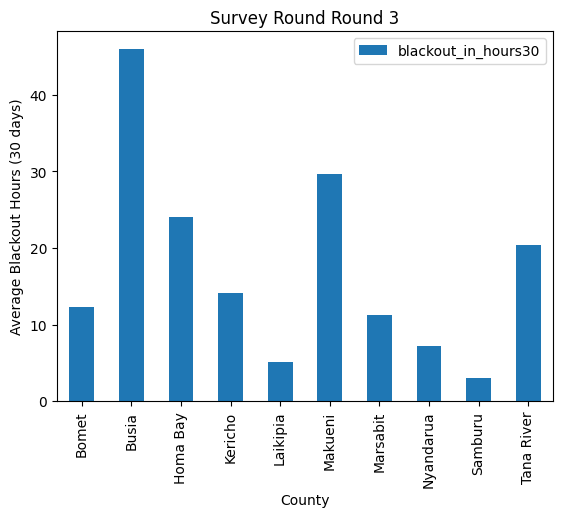

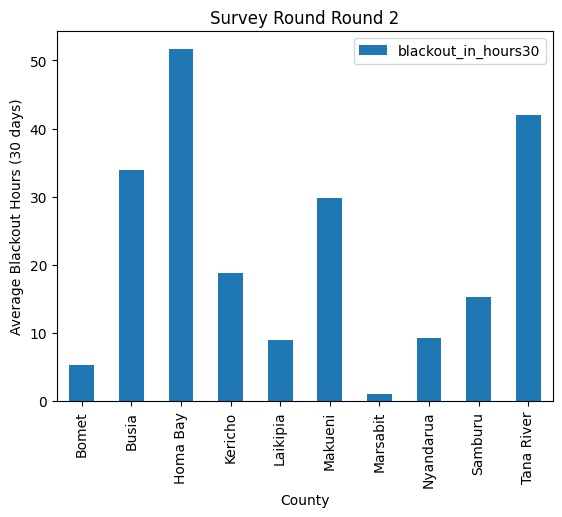

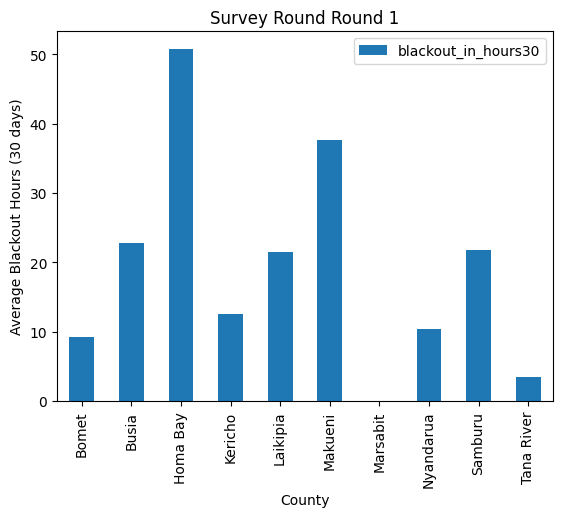

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/merged_healthcare_data.csv')

blackout_occurrence = df[["county",
                          'blackout',
                          'facility_name',
                          'facility_id',
                          'kplc_connected',
                          "bb_18total_blackout_days30",
                          "total_days_w_blackout30",
                          "blackout_in_days30",
                          "blackout_in_hours30",
                          "survey_round"]]

blackout_occurrence['blackout_in_hours30'][blackout_occurrence['blackout_in_hours30'] > 720] = np.nan
blackout_occurrence['blackout_in_hours30'][blackout_occurrence['blackout_in_hours30'] < 0] = np.nan
blackout_occurrence = blackout_occurrence.fillna(0)

# Identify unique survey rounds
unique_rounds = blackout_occurrence['survey_round'].unique()

# Plotting graphs for each survey round
for round_num in unique_rounds:
    round_data = blackout_occurrence[blackout_occurrence['survey_round'] == round_num]
    
    aggregate_county = round_data.groupby('county').agg({'blackout_in_hours30': 'mean'})
    aggregate_county.reset_index(inplace=True)
    
    aggregate_county.plot.bar(x="county",y= "blackout_in_hours30", title=f"Survey Round {round_num}")
    plt.xlabel("County")
    plt.ylabel("Average Blackout Hours (30 days)")
    plt.show()


# 30 days blackout with survey rounds clustered

<ipython-input-7-6702e5b25f46>:5: DtypeWarning: Columns (3,39,40,50,52,56,61,93,123,144,153,160,165,168,171,183,188,189,206,214,220,228,231,232,236,238,259,355,356,453,459,467,473,481,484,485,489,491,512,513,608,609,706,709,712,720,726,766,861,862,959,965,973,979,1019,1114,1115,1218,1226,1232,1272,1367,1368,1465,1471,1479,1485,1525,1718,1724,1732,1738,1778,1874,1971,1974,1977,2031,2224,2227,2230,2477,2480,2483,2730,2732,2778,2788,2789,2790,2792,2800,2801,2803,2804,2808,2809,2816,2824,2854,2865,2866,2879,2880,2890,2893,2894,2899,2939,2969,2974,2980,2981,2995,2996,3065,3139,3148,3161,3178,3179) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/merged_healthcare_data.csv')
<ipython-input-7-6702e5b25f46>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

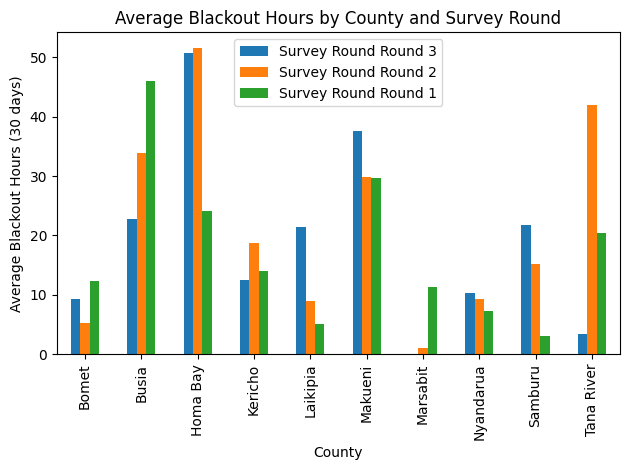

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/merged_healthcare_data.csv')

blackout_occurrence = df[["county",
                          'blackout',
                          'facility_name',
                          'facility_id',
                          'kplc_connected',
                          "bb_18total_blackout_days30",
                          "total_days_w_blackout30",
                          "blackout_in_days30",
                          "blackout_in_hours30",
                          "survey_round"]]

blackout_occurrence['blackout_in_hours30'][blackout_occurrence['blackout_in_hours30'] > 720] = np.nan
blackout_occurrence['blackout_in_hours30'][blackout_occurrence['blackout_in_hours30'] < 0] = np.nan
blackout_occurrence = blackout_occurrence.fillna(0)

# Identify unique survey rounds
unique_rounds = blackout_occurrence['survey_round'].unique()

# Create a grouped DataFrame for all survey rounds
grouped_county = blackout_occurrence.groupby(['county', 'survey_round']).agg({'blackout_in_hours30': 'mean'}).unstack()

# Plotting the clustered bar graph
grouped_county.plot(kind='bar', stacked=False)
plt.xlabel('County')
plt.ylabel('Average Blackout Hours (30 days)')
plt.title('Average Blackout Hours by County and Survey Round')
plt.legend(labels=['Survey Round ' + str(round_num) for round_num in unique_rounds])

# Adjust the spacing between bars
plt.tight_layout()

# Show the plot
plt.show()


# 7 days blackout


<ipython-input-3-1b1a0f0721df>:5: DtypeWarning: Columns (3,39,40,50,52,56,61,93,123,144,153,160,165,168,171,183,188,189,206,214,220,228,231,232,236,238,259,355,356,453,459,467,473,481,484,485,489,491,512,513,608,609,706,709,712,720,726,766,861,862,959,965,973,979,1019,1114,1115,1218,1226,1232,1272,1367,1368,1465,1471,1479,1485,1525,1718,1724,1732,1738,1778,1874,1971,1974,1977,2031,2224,2227,2230,2477,2480,2483,2730,2732,2778,2788,2789,2790,2792,2800,2801,2803,2804,2808,2809,2816,2824,2854,2865,2866,2879,2880,2890,2893,2894,2899,2939,2969,2974,2980,2981,2995,2996,3065,3139,3148,3161,3178,3179) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/merged_healthcare_data.csv')
<ipython-input-3-1b1a0f0721df>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

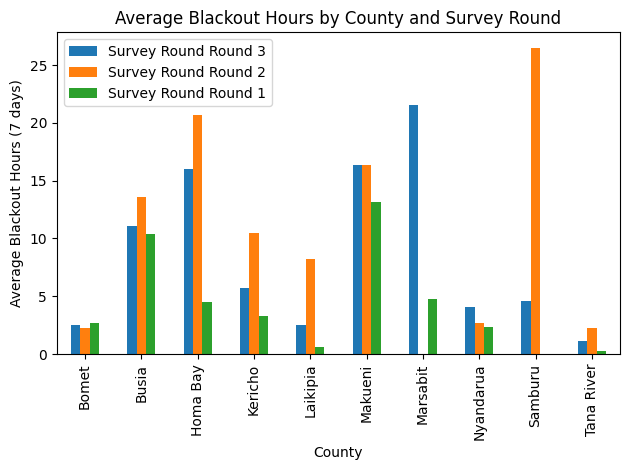

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/merged_healthcare_data.csv')

blackout_occurrence = df[[                       'survey_round',
                                                 'kplc_connected',
                                                 'county',
                                                 'facility_name',
                                                 'facility_id',
                                                 'blackout',
                                                 'blackout_days',
                                                 'total_blackout_days7',
                                                 'total_days_w_blackout7',
                                                 'blackout_in_days7',
                                                 'blackout_in_hours7']]

blackout_occurrence['blackout_in_hours7'][blackout_occurrence['blackout_in_hours7'] > 168] = np.nan
blackout_occurrence['blackout_in_hours7'][blackout_occurrence['blackout_in_hours7'] < 0] = np.nan
blackout_occurrence = blackout_occurrence.fillna(0)

# Identify unique survey rounds
unique_rounds = blackout_occurrence['survey_round'].unique()

# Create a grouped DataFrame for all survey rounds
grouped_county = blackout_occurrence.groupby(['county', 'survey_round']).agg({'blackout_in_hours7': 'mean'}).unstack()

# Plotting the clustered bar graph
grouped_county.plot(kind='bar', stacked=False)
plt.xlabel('County')
plt.ylabel('Average Blackout Hours (7 days)')
plt.title('Average Blackout Hours by County and Survey Round')
plt.legend(labels=['Survey Round ' + str(round_num) for round_num in unique_rounds])

# Adjust the spacing between bars
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-53-d1b59bd8541c>:5: DtypeWarning: Columns (3,39,40,50,52,56,61,93,123,144,153,160,165,168,171,183,188,189,206,214,220,228,231,232,236,238,259,355,356,453,459,467,473,481,484,485,489,491,512,513,608,609,706,709,712,720,726,766,861,862,959,965,973,979,1019,1114,1115,1218,1226,1232,1272,1367,1368,1465,1471,1479,1485,1525,1718,1724,1732,1738,1778,1874,1971,1974,1977,2031,2224,2227,2230,2477,2480,2483,2730,2732,2778,2788,2789,2790,2792,2800,2801,2803,2804,2808,2809,2816,2824,2854,2865,2866,2879,2880,2890,2893,2894,2899,2939,2969,2974,2980,2981,2995,2996,3065,3139,3148,3161,3178,3179) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/merged_healthcare_data.csv')
<ipython-input-53-d1b59bd8541c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blacko

IndexError: ignored

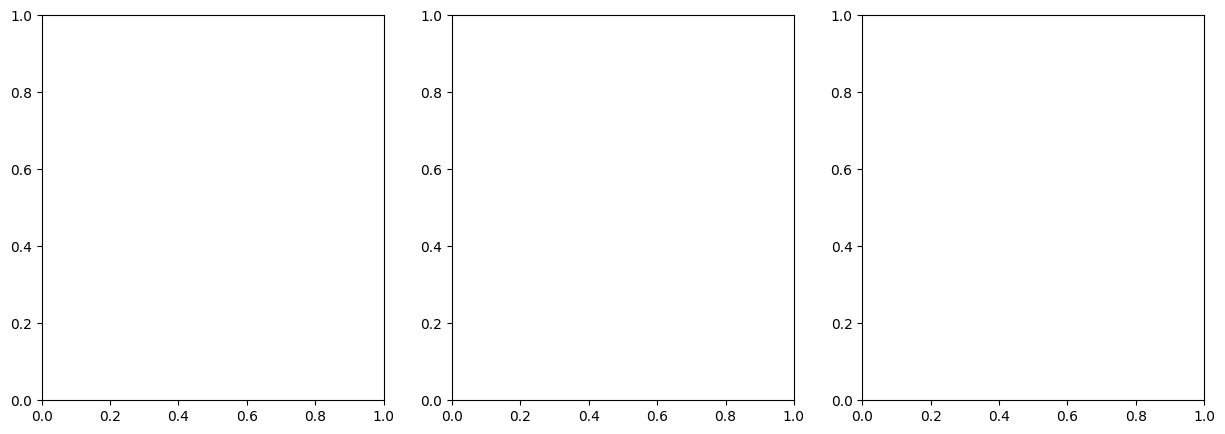

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/merged_healthcare_data.csv')

blackout_occurrence = df[["county",
                          'blackout',
                          'facility_name',
                          'facility_id',
                          'kplc_connected',
                          "bb_18total_blackout_days30",
                          "total_days_w_blackout30",
                          "blackout_in_days30",
                          "blackout_in_hours30",
                          "survey_round"]]

blackout_occurrence['blackout_in_hours30'][blackout_occurrence['blackout_in_hours30'] > 720] = np.nan
blackout_occurrence['blackout_in_hours30'][blackout_occurrence['blackout_in_hours30'] < 0] = np.nan
blackout_occurrence = blackout_occurrence.fillna(0)

# Identify unique survey rounds
unique_rounds = blackout_occurrence['survey_round'].unique()

# Prepare subplots for multiple graphs
num_columns = 3  # Number of columns per row
num_rows = (len(unique_rounds) + num_columns - 1) // num_columns  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))

# Plotting graphs for each survey round
for idx, round_num in enumerate(unique_rounds):
    row = idx // num_columns
    col = idx % num_columns
    
    round_data = blackout_occurrence[blackout_occurrence['survey_round'] == round_num]
    aggregate_county = round_data.groupby('county').agg({'blackout_in_hours30': 'mean'})
    aggregate_county.reset_index(inplace=True)
    
    axes[row, col].bar(aggregate_county['county'], aggregate_county['blackout_in_hours30'])
    axes[row, col].set_title(f"Survey Round {round_num}")
    axes[row, col].set_xlabel("County")
    axes[row, col].set_ylabel("Average Blackout Hours (30 days)")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
